# Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [40]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [41]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [42]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [43]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [46]:
#Checking duplicates
print("Duplicates in Training Data")
print((train_df.duplicated().sum()),round(train_df.duplicated().sum()/len(train_df)*100,2))
print("Duplicates in Test Data")
print((test_df.duplicated().sum()),round(test_df.duplicated().sum()/len(train_df)*100,2))

Duplicates in Training Data
0 0.0
Duplicates in Test Data
0 0.0


In [47]:
#Checking Dtypes
print("Checking Dtypes in Training Data")
print("\n")
print(train_df.dtypes)
print("\n")
print("-"*40)
print("Checking Dtypes in Test Data")
print(test_df.dtypes)

Checking Dtypes in Training Data


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


----------------------------------------
Checking Dtypes in Test Data
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [48]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [49]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


# EDA

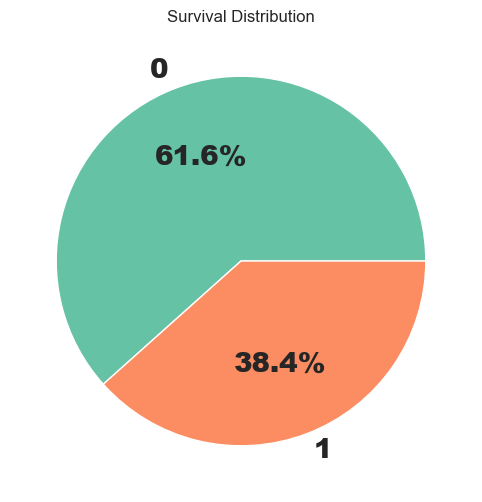

In [50]:
plt.figure(figsize = (12,6))
plt.pie(train_df["Survived"].value_counts(),labels = train_df["Survived"].value_counts().keys(),autopct="%1.1f%%",textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Survival Distribution")
plt.show()

Only 38% of people survived

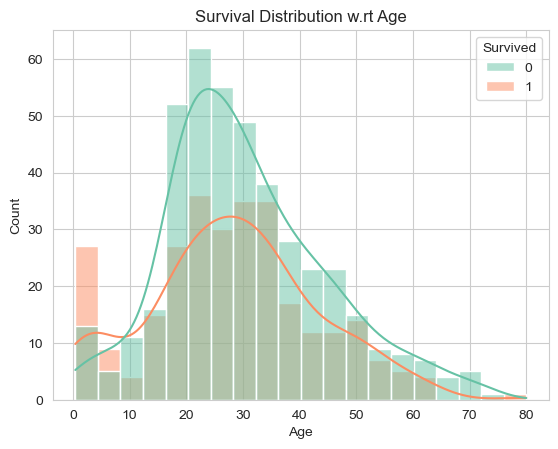

In [51]:
sns.histplot(x="Age",data=train_df,kde=True,hue="Survived",palette="Set2",bins=20)
plt.title("Survival Distribution w.rt Age")
plt.show()

* Distribution is Normal
* Most of the people survived within 10 years of age
* Minimum age is 0 amd Max age is 80


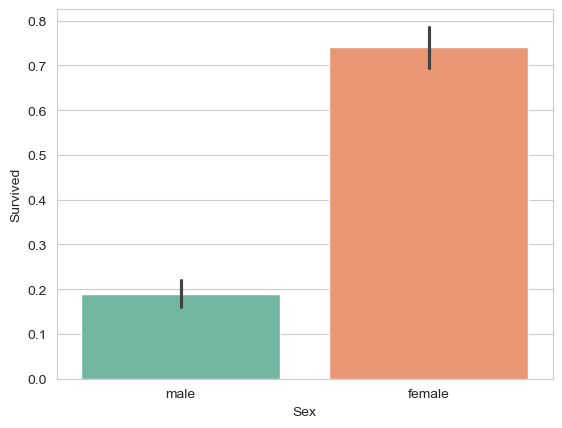

The percentage of values 
Survival Ratio of Males: 18.890814558058924
Survival Ratio of Females 74.20382165605095


In [52]:
sns.barplot(x='Sex',y='Survived',data=train_df,palette="Set2")
plt.show()
print("The percentage of values ")
print("Survival Ratio of Males:",train_df["Survived"][train_df["Sex"]=="male"].value_counts(normalize=True)[1]*100)
print("Survival Ratio of Females",train_df["Survived"][train_df["Sex"]=="female"].value_counts(normalize=True)[1]*100)

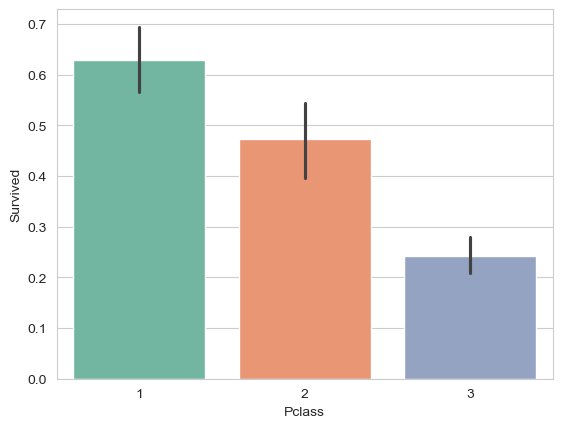

Survival Rate of Class1 62.96
Survival Rate of Class2 47.28
Survival Rate of Class3 24.24


In [53]:
sns.barplot(x='Pclass',y='Survived',data=train_df,palette="Set2")
plt.show()
print("Survival Rate of Class1",round(train_df["Survived"][train_df["Pclass"]==1].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of Class2",round(train_df["Survived"][train_df["Pclass"]==2].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of Class3",round(train_df["Survived"][train_df["Pclass"]==3].value_counts(normalize=True)[1]*100,2))

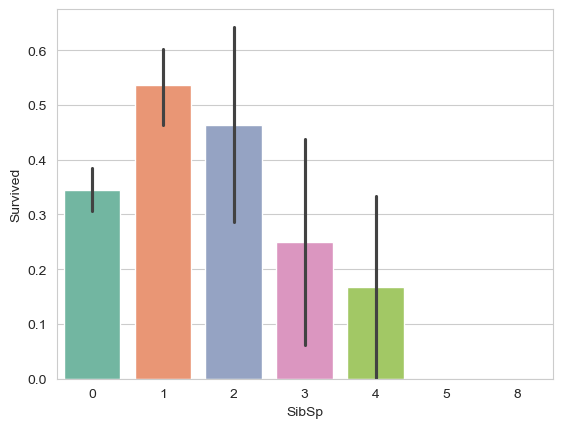

Survival Rate of 0 Siblings 34.54
Survival Rate of 1 Siblings 53.59
Survival Rate of 2 Siblings 46.43
Survival Rate of 3 Siblings 25.0
Survival Rate of 4 Siblings 16.67


In [54]:
sns.barplot(x='SibSp',y='Survived',data=train_df,palette="Set2")
plt.show()
print("Survival Rate of 0 Siblings",round(train_df["Survived"][train_df["SibSp"]==0].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 1 Siblings",round(train_df["Survived"][train_df["SibSp"]==1].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 2 Siblings",round(train_df["Survived"][train_df["SibSp"]==2].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 3 Siblings",round(train_df["Survived"][train_df["SibSp"]==3].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 4 Siblings",round(train_df["Survived"][train_df["SibSp"]==4].value_counts(normalize=True)[1]*100,2))



* The survival rate of a couple or a couple with a single parent/child has highest survival rate.
* The survival rate of a single identity comes next.
* The survival rate with more more family members is low.

In [55]:
train_df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

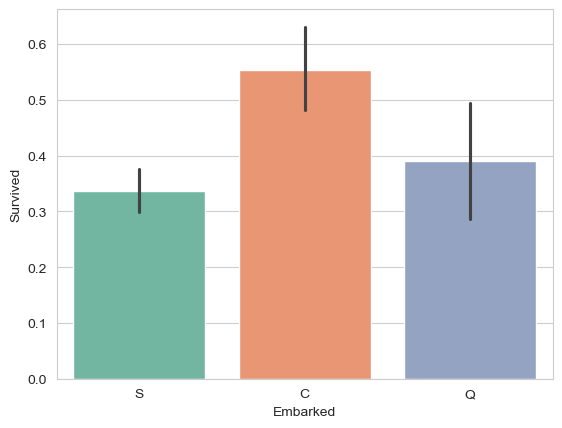

Survival Rate of passengers embarked from Cherbourg 55.36
Survival Rate of passengers embarked from Queensland 38.96
Survival Rate of passengers embarked from SouthHampton 33.7


In [56]:
sns.barplot(x="Embarked",y="Survived",data=train_df,palette="Set2")
plt.show()
print("Survival Rate of passengers embarked from Cherbourg",round(train_df["Survived"][train_df["Embarked"]=="C"].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of passengers embarked from Queensland",round(train_df["Survived"][train_df["Embarked"]=="Q"].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of passengers embarked from SouthHampton",round(train_df["Survived"][train_df["Embarked"]=="S"].value_counts(normalize=True)[1]*100,2))

Survival Rate from Cherbourg was highest while from SouthHampton was lowest

Lets plot Pclass with Passengers Embarked

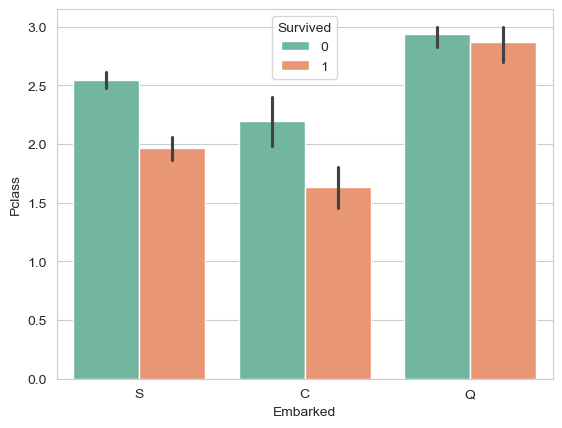

In [57]:
sns.barplot(x='Embarked',y='Pclass',hue="Survived",data=train_df,palette="Set2")
plt.show()

Plotting Age after converting into categories

In [58]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train_df.Age, bins, labels = labels)
train_df['AgeGroup'] = age_groups
test_df['AgeGroup'] = age_groups

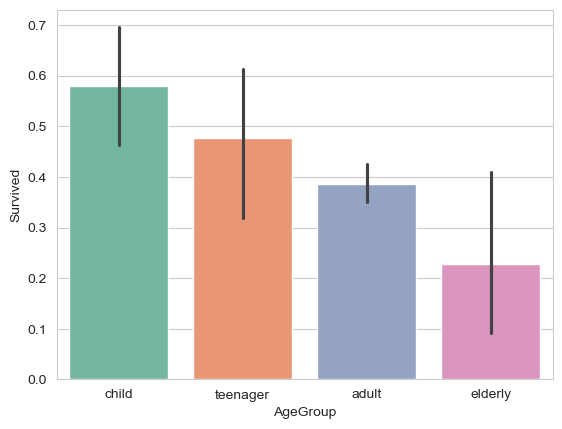

In [59]:
sns.barplot(x='AgeGroup',y='Survived',data=train_df,palette="Set2")
plt.show()

# Feature Engineering


### Extracting Titles from Names

In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [61]:
def extract_title(df):
    df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    df['Title']=df['Title'].replace(['Lady','Mme','the Countess','Dona'],'Mrs')
    df['Title']=df['Title'].replace(['Col','Major','Capt'],'Military Officer')
    df['Title']=df['Title'].replace(['Mlle','Ms'],'Miss')
    df['Title']=df['Title'].replace(['Dr','Rev','Jonkheer','Sir','Don'],'Noble')





In [62]:
extract_title(train_df)
extract_title(test_df)

In [63]:
train_df['Title'].value_counts()

Title
Mr                  517
Miss                185
Mrs                 128
Master               40
Noble                16
Military Officer      5
Name: count, dtype: int64

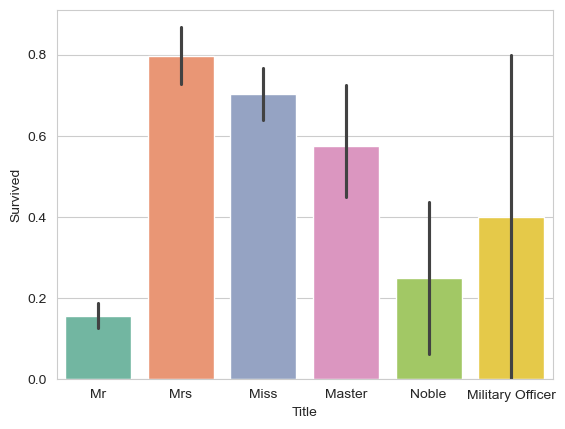

In [64]:
sns.barplot(x='Title',y='Survived',data=train_df,palette="Set2")
plt.show()

In [65]:
print("Survival Rates of Titles")
print("Mr")
print(round(train_df["Survived"][train_df["Title"]=="Mr"].value_counts(normalize=True)[1]*100,2))
print("Mrs")
print(round(train_df["Survived"][train_df["Title"]=="Mrs"].value_counts(normalize=True)[1]*100,2))
print("Miss")
print(round(train_df["Survived"][train_df["Title"]=="Miss"].value_counts(normalize=True)[1]*100,2))
print("Master")
print(round(train_df["Survived"][train_df["Title"]=="Master"].value_counts(normalize=True)[1]*100,2))
print("Noble")
print(round(train_df["Survived"][train_df["Title"]=="Noble"].value_counts(normalize=True)[1]*100,2))
print("Military Officer")
print(round(train_df["Survived"][train_df["Title"]=="Military Officer"].value_counts(normalize=True)[1]*100,2))

Survival Rates of Titles
Mr
15.67
Mrs
79.69
Miss
70.27
Master
57.5
Noble
25.0
Military Officer
40.0


In [66]:
def manipulate_family_members(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['FamilySize']>1]=0


In [67]:
manipulate_family_members(train_df)
manipulate_family_members(test_df)

In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,Mr,1,1


In [74]:
def extract_deck(df):
    df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
    df['Deck']=df['Deck'].replace(['A','B','C'],'ABC')
    df['Deck']=df['Deck'].replace(['D','E'],'DE')
    df['Deck']=df['Deck'].replace(['F','G'],'FG')

In [75]:
extract_deck(train_df)
extract_deck(test_df)